In [16]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import numpy as np
import tensorflow as tf
import requests
from PIL import Image
import matplotlib.pyplot as plt

Assuming you achieved pretty good accuracy during the training and testing phases, you can now use the trained model for inference. In other words, the model should predict the classification of images that the network has never seen before.

But before you move on, load the code you've already seen in previous notebooks:

In [17]:
!wget -Nq https://raw.githubusercontent.com/MicrosoftDocs/tensorflow-learning-path/main/intro-keras/kintro.py
from kintro import *

Remember that in the previous notebook, after successfully training our network, you saved the model. Let's load it back into memory.

In [18]:
model = tf.keras.models.load_model('outputs/model')

2025-03-17 10:54:54.967467: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2025-03-17 10:54:55.314466: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-03-17 10:54:55.314929: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (vm1f7213017f): /proc/driver/nvidia/version does not exist
2025-03-17 10:54:55.320864: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2025-03-17 10:54:55.359181: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2294680000 Hz
2025-03-17 10:54:55.360182: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fe0140069d0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-03-17 

Making a prediction is easy. Simply call the model's `predict` method and pass one or more images. Let's start by getting the image you'll use for prediction, and display it:

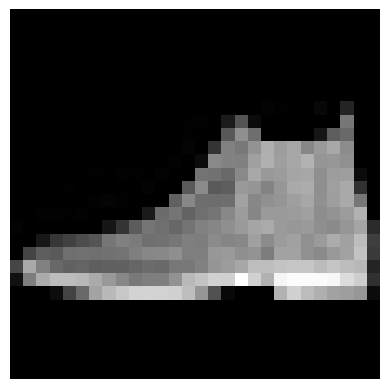

In [19]:
url = 'https://raw.githubusercontent.com/MicrosoftDocs/tensorflow-learning-path/main/intro-keras/predict-image.png'

with Image.open(requests.get(url, stream=True).raw) as image:
  X = np.asarray(image, dtype=np.float32).reshape((-1, 28, 28)) / 255.0

plt.figure()
plt.axis('off')
plt.imshow(X.squeeze(), cmap='gray')
plt.show()

As you can see, you have an image of an ankle boot. In the code below, load the image, call `predict` to get its class index, and map that index to the class name.  

In [20]:
predicted_vector = model.predict(X)
predicted_index = np.argmax(predicted_vector)
predicted_name = labels_map[predicted_index]

print(f'Predicted class: {predicted_name}')

Predicted class: Ankle Boot


Note that you can also get probabilities of the input image being of a certain class, in which case you need to normalize the output of your network using `softmax` to get probabilities. Here are the predictions for your image: 

In [21]:
probs = tf.nn.softmax(predicted_vector.reshape((-1,)))
for i,p in enumerate(probs):
    print(f'{labels_map[i]} -> {p:.3f}')

T-Shirt -> 0.000
Trouser -> 0.000
Pullover -> 0.000
Dress -> 0.000
Coat -> 0.000
Sandal -> 0.122
Shirt -> 0.000
Sneaker -> 0.098
Bag -> 0.018
Ankle Boot -> 0.762


If you need to compute probabilities often, you can specify `activation='softmax'` for the final `Dense` layer of your network. In this case the network would give you probabilities as output, and you need to omit `use_logits=True` in the `SparseCategoricalCrossentropy` loss function. 